In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

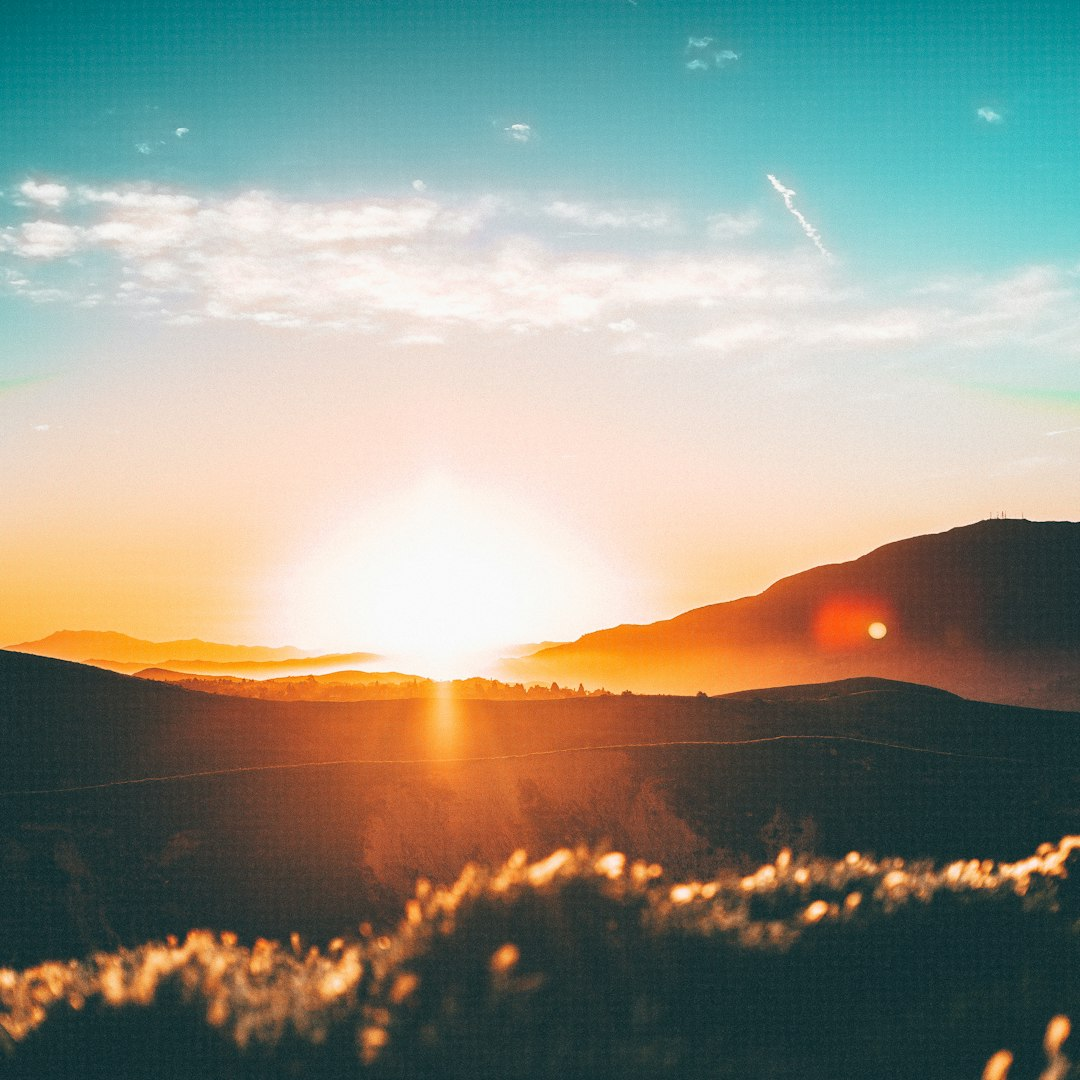

In [ ]:
image=Image.open('/content/drive/MyDrive/Colab Notebooks/test_image.jpeg')
display(image)

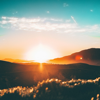

In [ ]:
image=image.resize((100,100))
display(image)

array([[[  1, 106, 112],
        [  1, 107, 112],
        [  1, 108, 114],
        ...,
        [  5, 136, 144],
        [  3, 136, 143],
        [  2, 135, 142]],

       [[  1, 109, 115],
        [  1, 110, 116],
        [  1, 111, 117],
        ...,
        [  7, 140, 147],
        [  5, 140, 146],
        [  6, 139, 146]],

       [[  1, 113, 119],
        [  1, 114, 120],
        [  2, 116, 122],
        ...,
        [ 10, 145, 151],
        [ 10, 144, 150],
        [ 10, 143, 149]],

       ...,

       [[ 37,  55,  51],
        [ 28,  51,  50],
        [ 19,  46,  49],
        ...,
        [137,  90,  58],
        [ 63,  64,  54],
        [ 17,  47,  49]],

       [[ 21,  47,  49],
        [ 22,  47,  50],
        [ 21,  47,  50],
        ...,
        [131,  98,  70],
        [122,  91,  66],
        [ 37,  54,  51]],

       [[ 20,  46,  50],
        [ 21,  46,  50],
        [ 22,  46,  50],
        ...,
        [194, 133,  87],
        [101,  82,  61],
        [ 33,  54,  51]]], dtype=uint8)
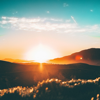

In [ ]:
image_data=np.array(image)
image_data

In [ ]:
pixels=image_data.reshape(-1,3).astype(float)
pixels

array([[  1., 106., 112.],
       [  1., 107., 112.],
       [  1., 108., 114.],
       ...,
       [194., 133.,  87.],
       [101.,  82.,  61.],
       [ 33.,  54.,  51.]])

In [ ]:
def initialize_centroid(pixel,k):
  indices=np.random.choice(len(pixel),k)
  centroid=pixel[indices]
  return centroid

def assign_cluster(pixel,centroid):
  distance=np.sqrt(np.sum((pixel-centroid[:,np.newaxis])**2,axis=2))
  cluster=np.argmin(distance,axis=0)
  return cluster

def update_centroid(pixel,cluster,k):
  centroid=np.array([pixel[cluster==i].mean(axis=0) for i in range(k)])
  return centroid

def visualize_iteration(pixel,cluster,centroids,iteration,width,height):
  segmented_img = np.array([centroids[label] for label in cluster])
  segmented_img = segmented_img.reshape(height, width, 3).astype(np.uint8)
  plt.figure(figsize=(4, 4))
  plt.imshow(segmented_img)
  plt.title(f"Iteration {iteration}")
  plt.axis("off")
  plt.show()

def kmeans(pixel,k):
  centroid=initialize_centroid(pixel,k)
  i=0
  while(True):
    cluster=assign_cluster(pixel,centroid)
    visualize_iteration(pixel,cluster,centroid,i,100,100)
    i+=1
    new_centroid=update_centroid(pixel,cluster,k)
    if np.all(centroid==new_centroid):
      break
    centroid=new_centroid
  return centroid,cluster

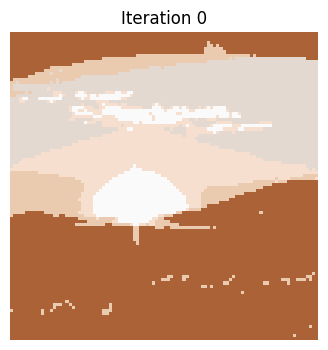

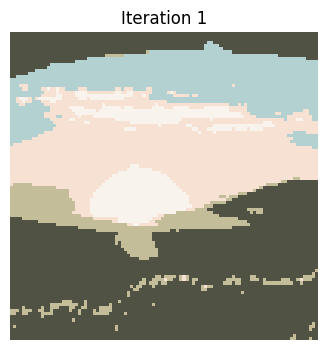

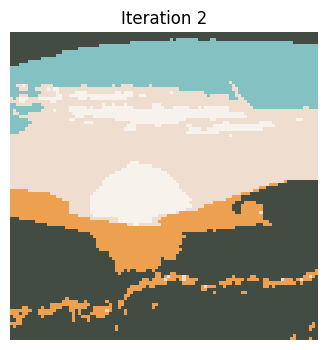

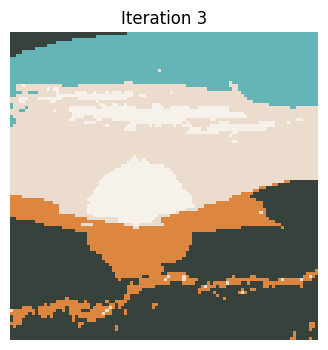

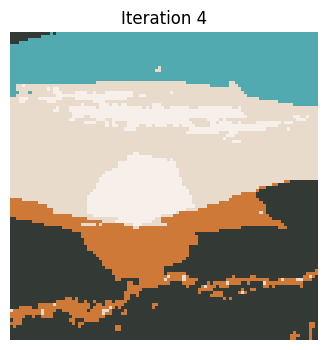

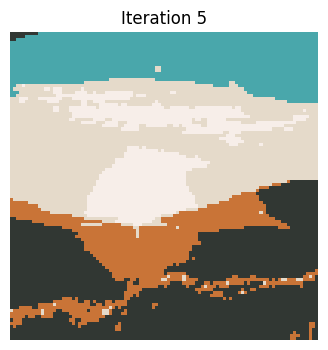

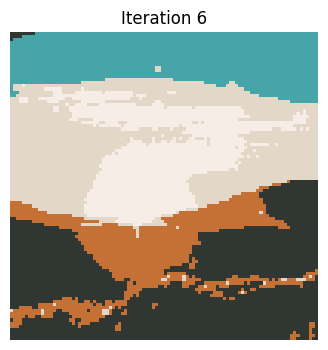

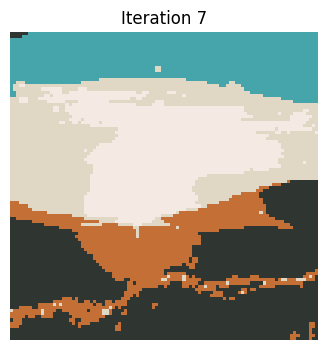

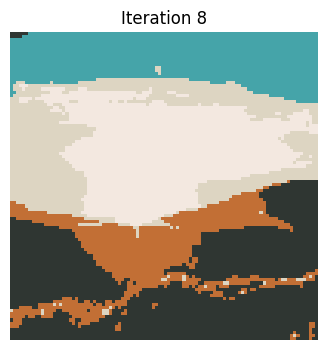

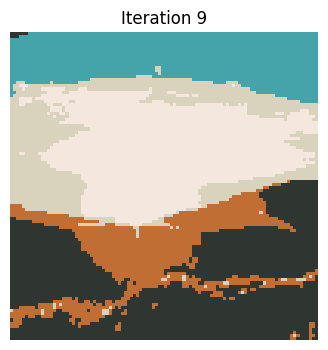

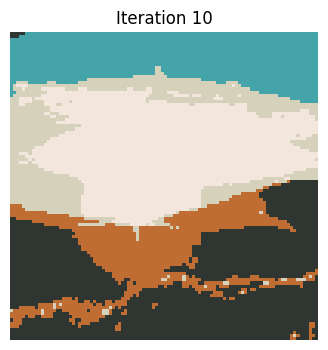

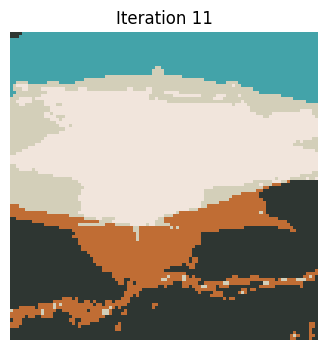

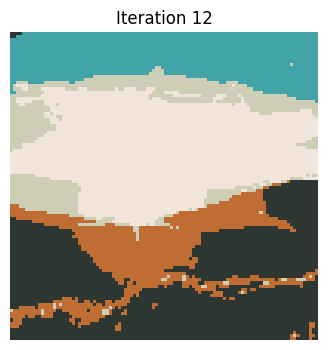

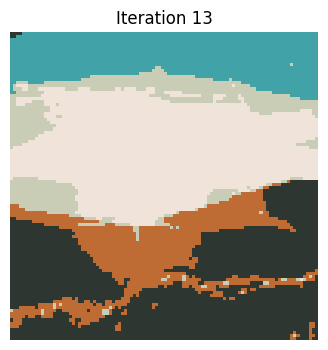

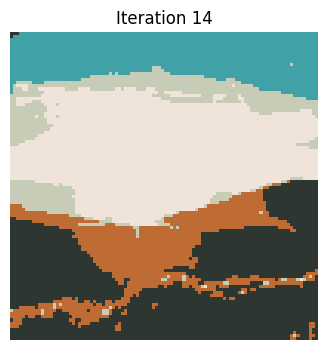

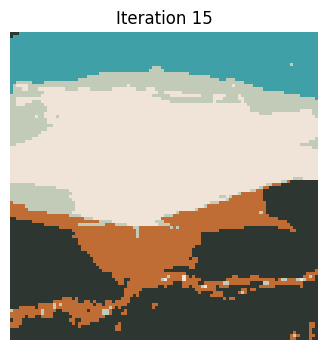

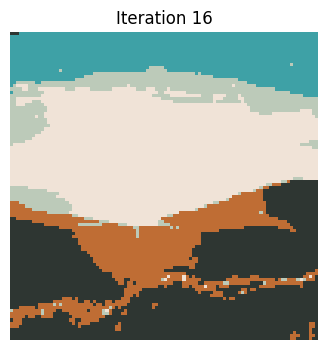

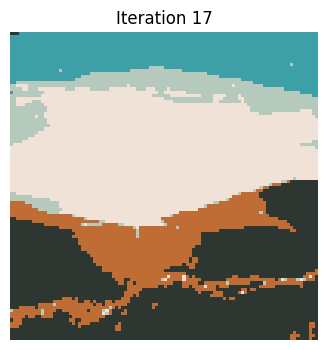

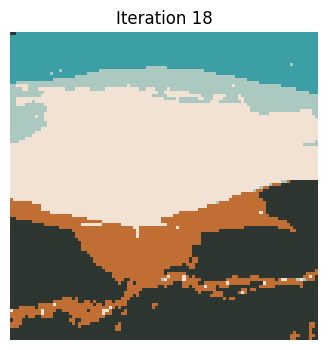

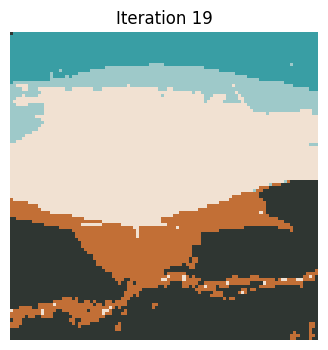

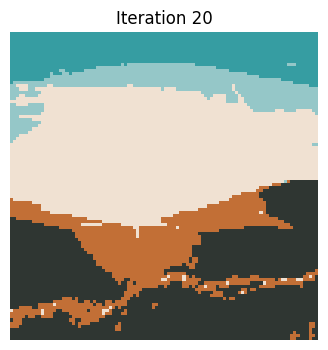

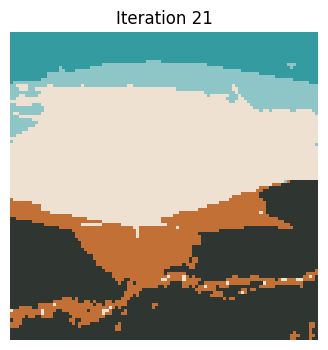

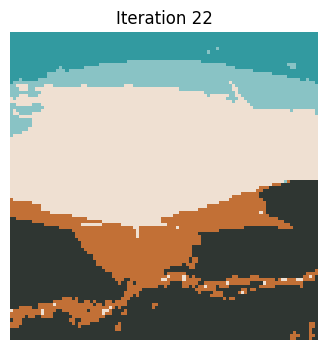

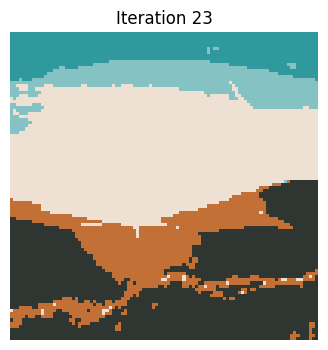

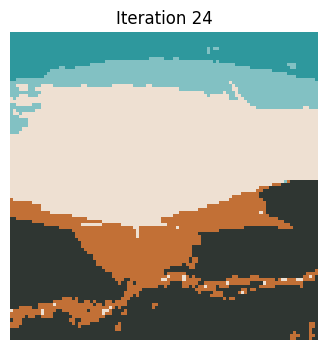

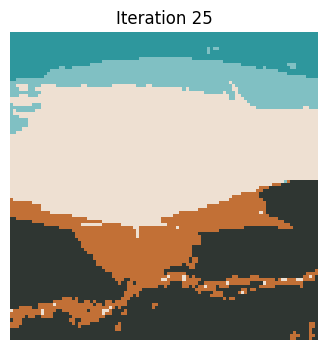

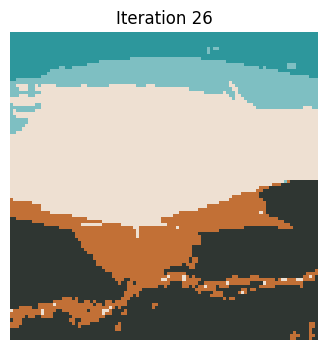

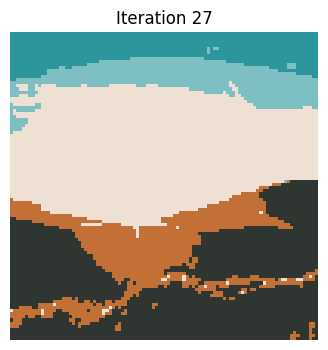

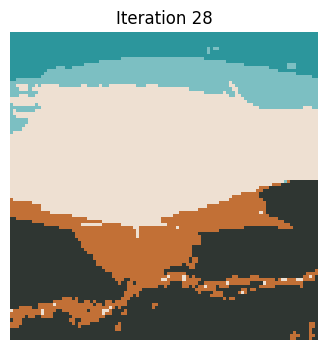

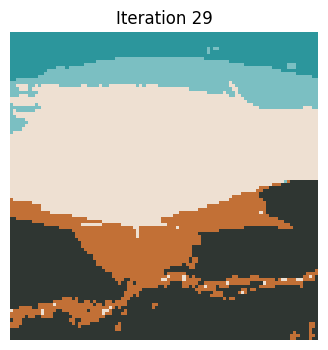

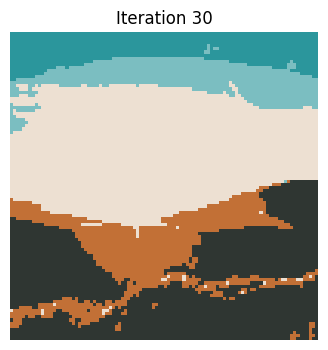

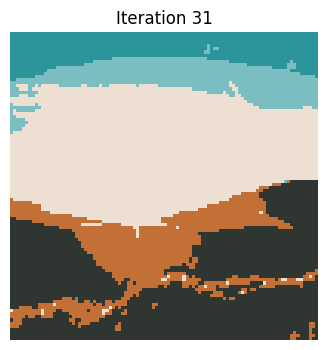

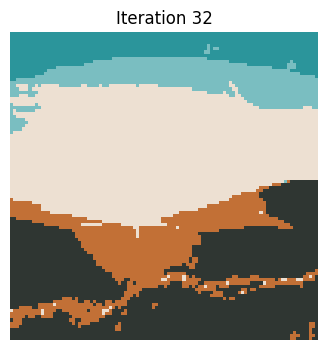

In [ ]:
k=5
centroid,cluster=kmeans(pixels,k)

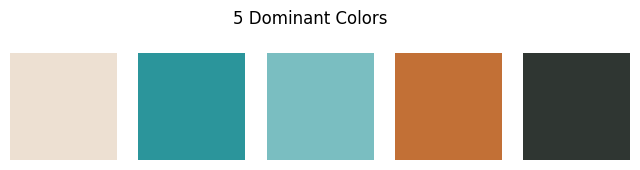

In [ ]:
plt.figure(figsize=(8, 2))
for i, color in enumerate(centroid.astype(int)):
    plt.subplot(1, k, i + 1)
    plt.axis('off')
    plt.imshow(np.ones((50, 50, 3), dtype=int) * color)
plt.suptitle("5 Dominant Colors")
plt.show()